In [1]:
%pylab inline
import cirq

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Quantum_Operation(input):
    operations = []
    
    # Applying Hadamard operation on every qubit
    for i in input:
        operations.append( cirq.H(i) )
        
    # Applying the required CNOT operations.
    for i in range(4):
        operations.append(cirq.CNOT(input[i], input[i+1]))
        
    # Swapping (0,4)
    operations.append( cirq.SWAP(input[0], input[4]) )
    
    # Roatating X with pi/2 on a random qubit
    operations.append(cirq.rx(numpy.pi/2)
                          (Qubits[numpy.random.randint(5)]))
    
    circuit = cirq.Circuit(operations)
    return circuit

In [3]:
Qubits = [ cirq.NamedQubit(str(i)) for i in range(5) ]

In [4]:
Quantum_Operation(Qubits)

0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@──────────────────┼───
              │                  │
2: ───H───────X───@───Rx(0.5π)───┼───
                  │              │
3: ───H───────────X───@──────────┼───
                      │          │
4: ───H───────────────X──────────×───

In [5]:
qbit = cirq.NamedQubit('qbit')
simulator = cirq.Simulator()
delta = numpy.pi / 60
circuit = cirq.Circuit( [ cirq.rx(delta)(qbit) for i in range(360) ] )

In [6]:
probablity = []
for i in simulator.simulate_moment_steps(circuit):
    prob = np.abs(i.state_vector()) **2
    probablity.append(prob[0])


Probablity of measuring |0> state


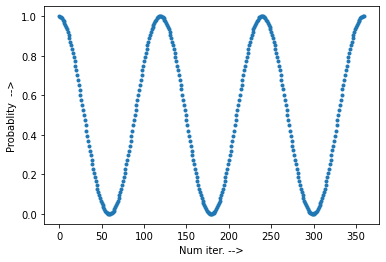

In [8]:
plot(probablity, ".")
ylabel("Probablity  -->")
xlabel("Num iter. -->")
print("Probablity of measuring |0> state")